In [30]:
import torch
import torchvision
from torchvision import datasets, transforms

import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn, optim
from time import time

In [31]:
size = 25

transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.Resize(size),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [32]:
trainset = datasets.ImageFolder(r'images\train',transform=transform)
print(trainset)
testset = datasets.ImageFolder(r'images\test',transform=transform)
print(testset)

Dataset ImageFolder
    Number of datapoints: 75
    Root location: images\train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=25, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset ImageFolder
    Number of datapoints: 20
    Root location: images\test
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=25, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [33]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5, shuffle = False)
print(trainloader)
testloader = torch.utils.data.DataLoader(testset, batch_size = 5, shuffle = False)
print(testloader)

torch.Size([5, 1, 35, 25])
tensor([0, 0, 0, 0, 0])


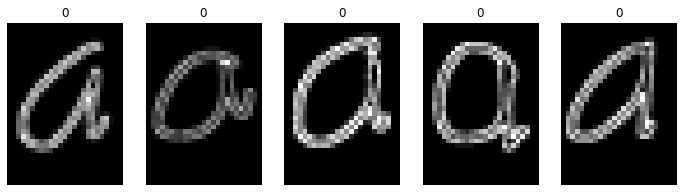

In [34]:
for batch_1 in trainloader: 
    batch = batch_1
    break

print(batch[0].shape)
m, ch, h, w = batch[0].shape
print(batch[1])
    
plt.figure(figsize=(12,8))
for i in range (m):
    plt.subplot(1,m,i+1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(h, w), cmap = 'gray')
    plt.title(int(batch[1][i]))
    plt.savefig('digit_mnist.png')
    
plt.show()

In [35]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [36]:
images, labels = dataiter.next() #ดึงข้อมูลอีกรอบ 
print(images.shape)
print(labels.shape)

torch.Size([5, 1, 35, 25])
torch.Size([5])


In [37]:
class CNN(nn.Module):
    def __init__(self, in_channels = 1, num_classes = 3):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 20, out_channels = 50, kernel_size = 5, stride = 1)
        
        self.fc1 = nn.Linear(in_features = 800, out_features = 500)
        self.fc2 = nn.Linear(in_features = 500, out_features = 10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  
        
        return x